---

# Calculus 

Calculus is a branch of mathematics that studies how things change. In Machine Learning (ML) and Deep Learning (DL), it helps us improve models by finding the best settings for their parameters. Two main ideas from calculus **derivatives** and **gradients** are especially important for this process.

## Why Calculus Matters in ML and DL

Calculus is the mathematics of change, and in ML and DL, it’s essential for:
- **Optimization**: Finding the best model parameters by minimizing loss functions (e.g., gradient descent).
- **Understanding Models**: Analyzing how inputs affect outputs (e.g., backpropagation).
- **Regularization**: Balancing model complexity and fit.
- **Probability**: Linking to probability density functions and expectations.

**Key Roles**
1. **Derivatives**: Measure how functions change, critical for optimization.
2. **Gradients**: Multi-dimensional derivatives, guiding parameter updates.
3. **Integrals**: Compute areas under curves, used in probability and normalization.

---

# Derivatives: Measuring Change

## What Are Derivatives?

A **derivative** measures how a function changes when its input changes. In simple terms, it’s the "slope" or steepness of the function at a specific point.

## Why They Help in ML

In ML, we use a **loss function** to measure how far off our predictions are from the actual results. The derivative of this loss function tells us how to adjust the model’s parameters to reduce the error.

## Example

Consider a simple function:
\[
f(x) = x^2
\]
Its derivative is:
\[
f'(x) = 2x
\]
- At \( x = 1 \), the derivative is \( f'(1) = 2 \) (a positive slope, meaning the function is increasing).
- At \( x = -1 \), it’s \( f'(-1) = -2 \) (a negative slope, meaning it’s decreasing).

This slope helps us decide how to change \( x \) to make \( f(x) \) smaller, which is key in training ML models.

In [1]:
from sympy import symbols, diff

# Define symbolic variable and function
x = symbols('x')
f = x**2 + 3*x + 2

# Derivative
f_prime = diff(f, x)
print("Derivative of f(x) = x^2 + 3x + 2:", f_prime)  # Output: 2*x + 3

# Evaluate at x = 2
value = f_prime.subs(x, 2)
print("Slope at x = 2:", value)  # Output: 7

Derivative of f(x) = x^2 + 3x + 2: 2*x + 3
Slope at x = 2: 7


---

# Partial Derivatives: Handling Multiple Variables

## What Are Partial Derivatives?

When a function has more than one variable—like \( f(x, y) \) a **partial derivative** measures how the function changes when only one variable changes, while the others stay fixed. In ML, models have many parameters (e.g., weights in a neural network), and partial derivatives help us adjust each one separately.

## Why They’re Important

ML models often predict based on multiple inputs, like size and location for house prices. Partial derivatives tell us how each parameter affects the error, letting us fine-tune them to improve predictions.

## Example: Linear Regression

In **linear regression**, we fit a line to data:
\[
y = w_1 x + w_0
\]
- \( y \): Predicted value
- \( x \): Input (e.g., house size)
- \( w_1 \): Slope (weight)
- \( w_0 \): Intercept (bias)

We measure error with the **Mean Squared Error (MSE)**:
\[
L(w_1, w_0) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w_1 x_i + w_0))^2
\]
- \( n \): Number of data points
- \( y_i \): Actual value
- \( x_i \): Input value

To minimize this error, we calculate partial derivatives:
1. For \( w_1 \):
\[
\frac{\partial L}{\partial w_1} = \frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1 x_i + w_0)) (-x_i)
\]
2. For \( w_0 \):
\[
\frac{\partial L}{\partial w_0} = \frac{2}{n} \sum_{i=1}^{n} (y_i - (w_1 x_i + w_0)) (-1)
\]

These tell us how to adjust \( w_1 \) and \( w_0 \) to lower the error.

In [2]:
# Function with two variables
y = symbols('y')
g = x**2 + y**2 + x*y

# Partial derivatives
dg_dx = diff(g, x)
dg_dy = diff(g, y)
print("∂g/∂x:", dg_dx)  # Output: 2*x + y
print("∂g/∂y:", dg_dy)  # Output: 2*y + x

∂g/∂x: 2*x + y
∂g/∂y: x + 2*y


---

# Gradients: Directions for Improvement

## What Are Gradients?

A **gradient** is a collection of partial derivatives for a function with multiple variables. It’s a vector that points in the direction where the function increases the most.

## How Gradients Help

In ML, we use gradients to find the minimum of the loss function. By moving in the **opposite direction** of the gradient (called the negative gradient), we reduce the error step by step.

---

# Gradient Descent: Step-by-Step Optimization

## What Is Gradient Descent?

**Gradient descent** is a method to minimize a loss function by repeatedly adjusting its parameters in the opposite direction of the gradient.

## How It Works

Imagine you’re on a hill and want to reach the bottom:
- The gradient shows the steepest way up.
- You step downhill (negative gradient) a little at a time until you reach the lowest point.

In ML, we update parameters like this:
\[
w_1 = w_1 - \eta \cdot \frac{\partial L}{\partial w_1}
\]
\[
w_0 = w_0 - \eta \cdot \frac{\partial L}{\partial w_0}
\]
- \( \eta \): Learning rate (how big each step is)

## Example: Linear Regression in Action

Here’s a small dataset:
| \( x \) (Size) | \( y \) (Price) |
|----------------|-----------------|
| 1              | 2               |
| 2              | 4               |
| 3              | 6               |

Using gradient descent, we adjust \( w_1 \) and \( w_0 \) until the line \( y = w_1 x + w_0 \) fits the data. After many steps, \( w_1 \) becomes 2 and \( w_0 \) becomes 0, giving \( y = 2x \)—the best fit.

## Python Code Example

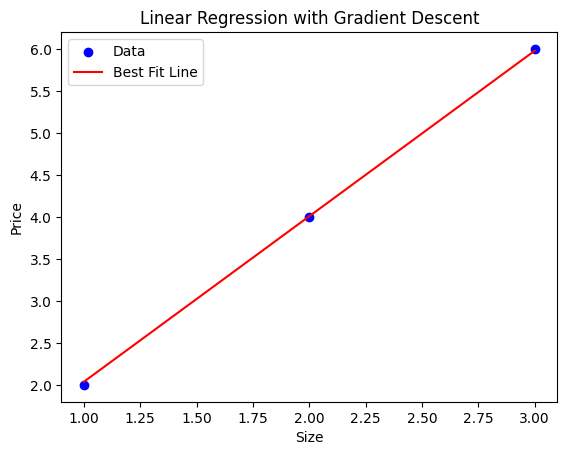

Slope (m): 1.97, Intercept (b): 0.07


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1], [2], [3]])
y = np.array([[2], [4], [6]])

# Starting values
m = 0.0  # Slope
b = 0.0  # Intercept
learning_rate = 0.01
steps = 1000
n = len(X)

# Gradient descent
for _ in range(steps):
    y_pred = m * X + b
    gradient_m = (-2/n) * np.sum(X * (y - y_pred))
    gradient_b = (-2/n) * np.sum(y - y_pred)
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

# Plot results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, m * X + b, color='red', label='Best Fit Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

print(f"Slope (m): {m:.2f}, Intercept (b): {b:.2f}")

This code finds the best-fit line by minimizing the error.

---

# Convolutional Neural Networks (CNNs): Calculus in Deep Learning

### What Are CNNs?

**Convolutional Neural Networks (CNNs)** are DL models designed for tasks like image recognition. They use calculus to learn patterns (e.g., edges, shapes) in images.

### How Calculus Helps CNNs

CNNs minimize a loss function using gradient descent, just like linear regression. However, they have many more parameters (weights in layers), and partial derivatives guide updates across all of them.

### Key Parts of a CNN

1. **Convolutional Layer**: Detects patterns using filters.
2. **Pooling Layer**: Shrinks data to focus on key features.
3. **Fully Connected Layer**: Combines features for predictions.

### Example: Image Classification

Here’s a simple CNN for classifying images from the CIFAR-10 dataset:

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])

# Compile and train
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Show a prediction
predictions = model.predict(x_test)
plt.imshow(x_test[0])
plt.title(f"Predicted: {predictions[0].argmax()}, True: {y_test[0][0]}")
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

This CNN uses gradient descent to adjust weights and classify images.

---

# Summary

- **Derivatives** show how a function changes, helping adjust model parameters.
- **Partial Derivatives** handle multiple variables, key for complex models.
- **Gradients** guide us to the minimum error using **gradient descent**.
- In ML (e.g., linear regression) and DL (e.g., CNNs), calculus optimizes models for better predictions.

---

# **What are Integrals in ML?**
Integrals represent the accumulation of quantities, often visualized as the area under a curve. In ML, they’re used to:
- **Compute Probabilities**: Integrate probability density functions (PDFs) over intervals.
- **Normalization**: Ensure distributions sum to 1.
- **Expectations**: Calculate averages or moments of random variables.
- **Loss Functions**: Define continuous objectives in some models.

In [ ]:
from sympy import integrate

# Integral of f(x) = 2x
h = 2*x
integral = integrate(h, x)
print("Integral of 2x:", integral)  # Output: x^2

# Definite integral from 0 to 2
def_integral = integrate(h, (x, 0, 2))
print("Area from 0 to 2:", def_integral)  # Output: 4

## **a. Probability and PDFs**
- **Concept**: For a continuous random variable \(X\) with PDF \(f(x)\), the probability over an interval \([a, b]\) is:
  \[
  P(a \leq X \leq b) = \int_a^b f(x) \, dx
  \]
- **Use**: Compute likelihoods in generative models.

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Normal distribution (mu=0, sigma=1)
norm = stats.norm(loc=0, scale=1)
x = np.linspace(-3, 3, 100)
pdf = norm.pdf(x)

# Probability P(-1 < X < 1)
prob = norm.cdf(1) - norm.cdf(-1)  # Cumulative Distribution Function (integral)
print("P(-1 < X < 1):", prob)  # Output: ~0.6827

# Visualize
plt.plot(x, pdf, label="PDF")
plt.fill_between(x, pdf, where=(x >= -1) & (x <= 1), alpha=0.3, color="skyblue", label="P(-1 < X < 1)")
plt.title("Normal Distribution")
plt.legend()
plt.show()

## **b. Normalization**
- **Concept**: Ensure a PDF integrates to 1 over its domain: \( \int_{-\infty}^{\infty} f(x) \, dx = 1 \).
- **Use**: Validate or adjust custom distributions.

In [ ]:
from sympy import symbols, integrate, exp

# Symbolic example: Exponential PDF
x = symbols('x')
lam = 2  # Rate parameter
f = lam * exp(-lam * x)  # f(x) = λe^(-λx), x >= 0

# Check normalization
integral = integrate(f, (x, 0, np.inf))
print("Integral (Normalization):", integral)  # Output: 1

## **c. Expectation (Mean)**
- **Concept**: \( E[X] = \int_{-\infty}^{\infty} x f(x) \, dx \) for continuous variables.
- **Use**: Predict average outcomes in probabilistic models.

In [ ]:
# Numerical integration for E[X] (normal distribution)
from scipy.integrate import quad

def integrand(x):
    return x * norm.pdf(x)

expectation, _ = quad(integrand, -np.inf, np.inf)
print("Expected Value (Mean):", expectation)  # Output: ~0 (matches mu=0)

## **d. Variance**
- **Concept**: \( \text{Var}(X) = E[(X - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) \, dx \).
- **Use**: Measure spread in uncertainty quantification.

In [ ]:
def var_integrand(x):
    return (x - norm.mean())**2 * norm.pdf(x)

variance, _ = quad(var_integrand, -np.inf, np.inf)
print("Variance:", variance)  # Output: ~1 (matches sigma^2=1)

## **e. Bayesian Marginalization**
- **Concept**: Marginal probability \( P(X) = \int P(X, Y) \, dY \).
- **Use**: Integrate out nuisance variables in Bayesian ML.

In [ ]:
# Joint PDF: P(X, Y) = N(X; 0, 1) * N(Y; 0, 1)
def joint_pdf(x, y):
    return norm.pdf(x) * norm.pdf(y)

# Marginal P(X) at x=0
marginal, _ = quad(lambda y: joint_pdf(0, y), -np.inf, np.inf)
print("Marginal P(X=0):", marginal)  # Output: ~0.3989 (matches N(0,1) PDF at 0)

---
## **5. Integrals in ML Algorithms**

### **a. Kernel Density Estimation (KDE)**
- Integrates kernel functions to estimate PDFs.

In [ ]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(tenure.reshape(-1, 1))
x = np.linspace(0, 30, 100)
log_dens = kde.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(log_dens), label="KDE")
plt.title("KDE of Tenure")
plt.show()

### **b. Bayesian Neural Networks**
- Integrate over weight distributions (often approximated).

In [ ]:
import tensorflow_probability as tfp

# Simple BNN prior
dist = tfp.distributions.Normal(loc=0., scale=1.)
x = np.linspace(-3, 3, 100)
pdf = dist.prob(x)
plt.plot(x, pdf)
plt.title("Prior Distribution")
plt.show()

---